In [ ]:
# Install pydrive2
!pip install -U -q PyDrive2

# Authenticate and import libraries
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate user
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the file with title 'tomato.zip'
file_list = drive.ListFile({'q': "title='tomato.zip'"}).GetList()
if file_list:
    file_id = file_list[0]['id']
    file = drive.CreateFile({'id': file_id})
    file.GetContentFile('tomato.zip')
    print("Download complete.")
else:
    print("File not found.")

# Unzip the file
!unzip -o 'tomato.zip'

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Late_blight/ac89de10-2de8-40a4-8f6e-f0a37e97cd57___RS_Late.B 5126.JPG  
  inflating: __MACOSX/tomato/train/Tomato___Late_blight/._ac89de10-2de8-40a4-8f6e-f0a37e97cd57___RS_Late.B 5126.JPG  
  inflating: tomato/train/Tomato___Late_blight/13668efa-2c92-4e5a-94e1-e0bc53aab6c6___RS_Late.B 6962.JPG  
  inflating: __MACOSX/tomato/train/Tomato___Late_blight/._13668efa-2c92-4e5a-94e1-e0bc53aab6c6___RS_Late.B 6962.JPG  
  inflating: tomato/train/Tomato___Late_blight/e678adf4-2b13-4027-91e8-e997c6362de0___GHLB2 Leaf 8714.JPG  
  inflating: __MACOSX/tomato/train/Tomato___Late_blight/._e678adf4-2b13-4027-91e8-e997c6362de0___GHLB2 Leaf 8714.JPG  
  inflating: tomato/train/Tomato___Late_blight/b3971b7c-ae24-4f4f-b426-3368096afeab___RS_Late.B 7079.JPG  
  inflating: __MACOSX/tomato/train/Tomato___Late_blight/._b3971b7c-ae24-4f4f-b426-3368096afeab___RS_Late.B 7079.JPG  
  inflating: tomato/train/Tomato___Late_blight/

In [ ]:
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras import optimizers
print(tf.__version__)


2.18.0


In [ ]:
image_size = 224
batch_size = 20

# Create separate ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.20)  # Define validation_split here
test_datagen = ImageDataGenerator(rescale=1/255)

dataset_train = '/content/tomato/train'

dataset_val = '/content/tomato/val'

# Use the 'subset' argument to specify training or validation data
train_dataset = train_datagen.flow_from_directory(
    dataset_train,
    shuffle=True,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    subset='training',  # Use subset='training' for training data
    seed=66
)

validation_dataset = train_datagen.flow_from_directory(
    dataset_val,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    subset='validation',  # Use subset='validation' for validation data
    seed=66,
    shuffle=False
)

print(train_dataset.class_indices)
print(validation_dataset.class_indices)
print(validation_dataset.classes)

Found 8000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6

In [ ]:

image_size = 224
input_shape = (image_size,image_size,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = input_shape, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,595,530 (21.35 MB)

 Trainable params: 5,595,530 (21.35 MB)

 Non-trainable params: 0 (0.00 B)

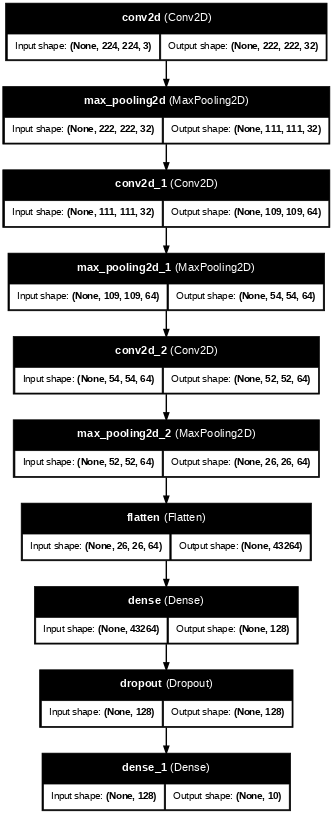

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=50)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-4),
    metrics=['acc']
)


In [ ]:
history = model.fit(train_dataset,
          epochs=30,
          validation_data=validation_dataset)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - acc: 0.2587 - loss: 2.0405 - val_acc: 0.5950 - val_loss: 1.1579
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - acc: 0.5708 - loss: 1.2479 - val_acc: 0.7400 - val_loss: 0.7478
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - acc: 0.6713 - loss: 0.9525 - val_acc: 0.7100 - val_loss: 0.7712
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.7250 - loss: 0.8058 - val_acc: 0.8350 - val_loss: 0.6166
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - acc: 0.7679 - loss: 0.6963 - val_acc: 0.8300 - val_loss: 0.5064
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - acc: 0.8008 - loss: 0.6034 - val_acc: 0.8750 - val_loss: 0.4161
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - acc: 0.8083 - loss: 0.5565 - val_acc: 0.8300 - val_loss: 0.4388
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.8341 - loss: 0.5002 - val_acc: 0.8750 - val_loss: 0.3915
Epoch 9/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 

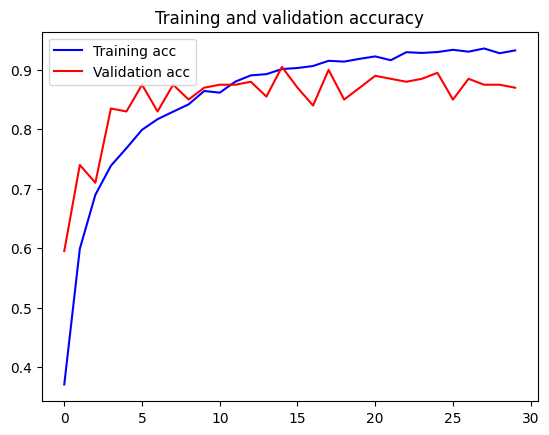

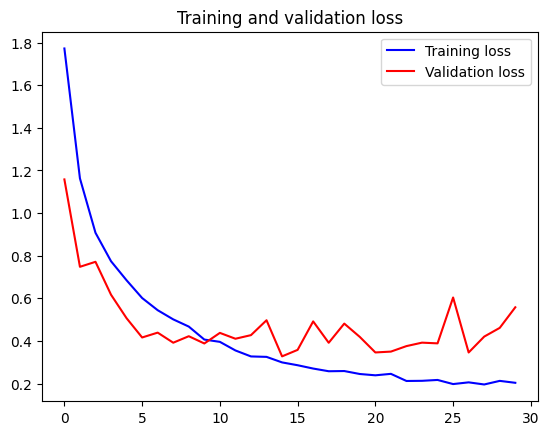

In [ ]:


# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:


scores = model.evaluate(validation_dataset, verbose=0)
print("test Accuracy: %.2f%%" % (scores[1]*100))


scores = model.evaluate(train_dataset, verbose=0)
print("train Accuracy: %.2f%%" % (scores[1]*100))

test Accuracy: 87.00%
train Accuracy: 98.56%


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


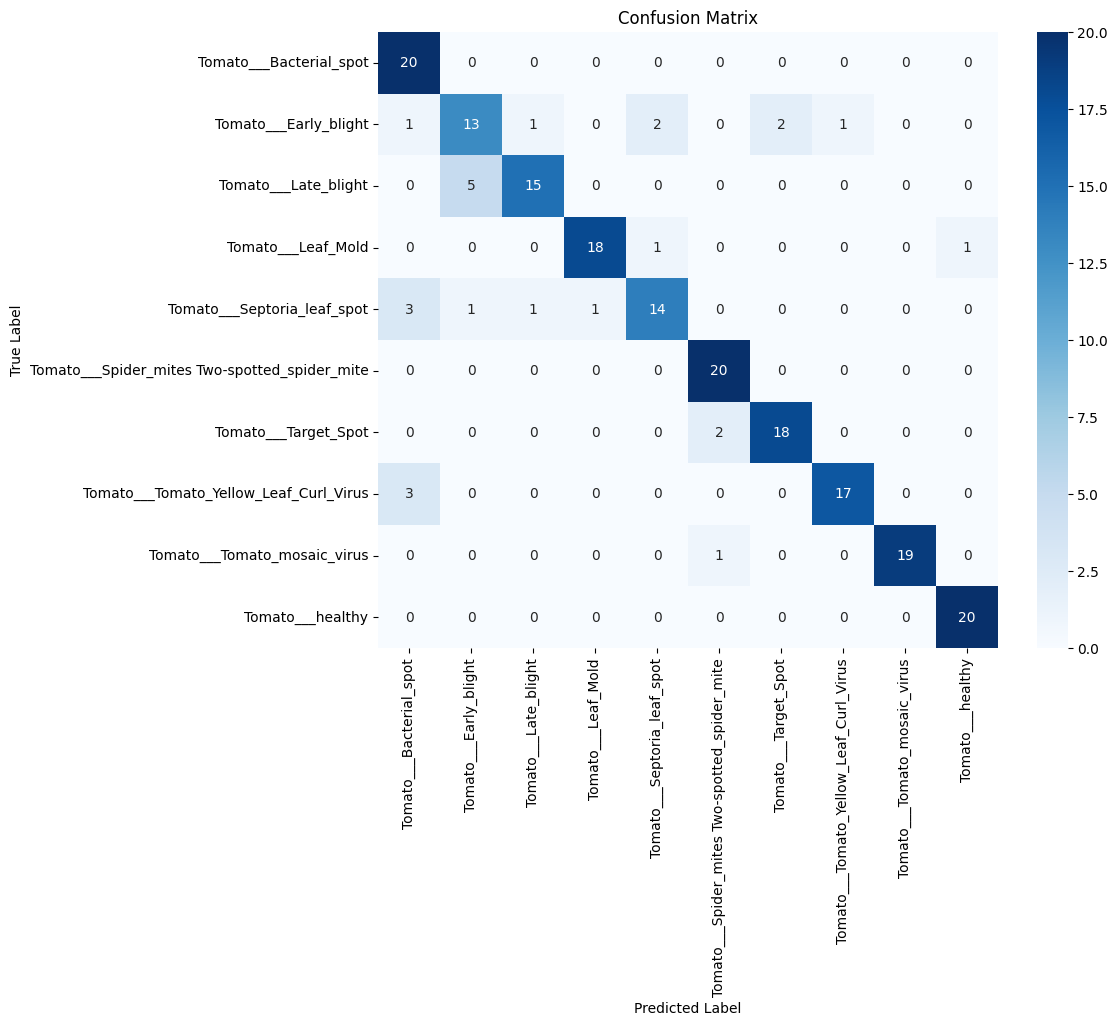

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get class names from the validation dataset
class_names = list(validation_dataset.class_indices.keys())

# Reset the validation dataset
validation_dataset.reset()

# Predict on the entire validation dataset at once
predictions = model.predict(validation_dataset, verbose=1)

# Get true labels from the dataset
true_labels = validation_dataset.classes  # Much faster! No need to loop
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


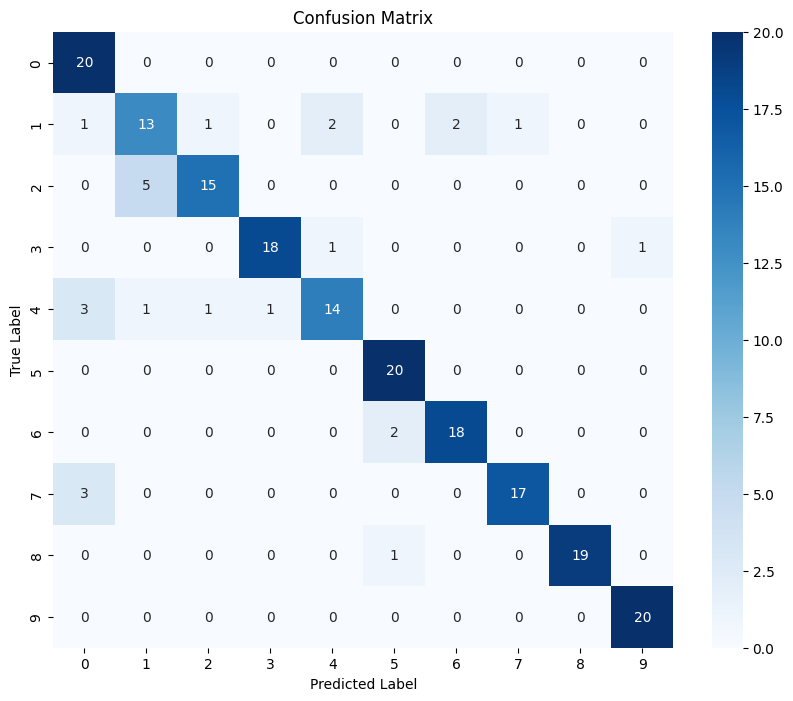

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reset the validation dataset
validation_dataset.reset()

# Predict on the entire validation dataset at once
predictions = model.predict(validation_dataset, verbose=1)

# Get true labels
true_labels = validation_dataset.classes
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create class labels as numbers
num_classes = cm.shape[0]
class_names = list(range(num_classes))  # [0, 1, 2, ..., n-1]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


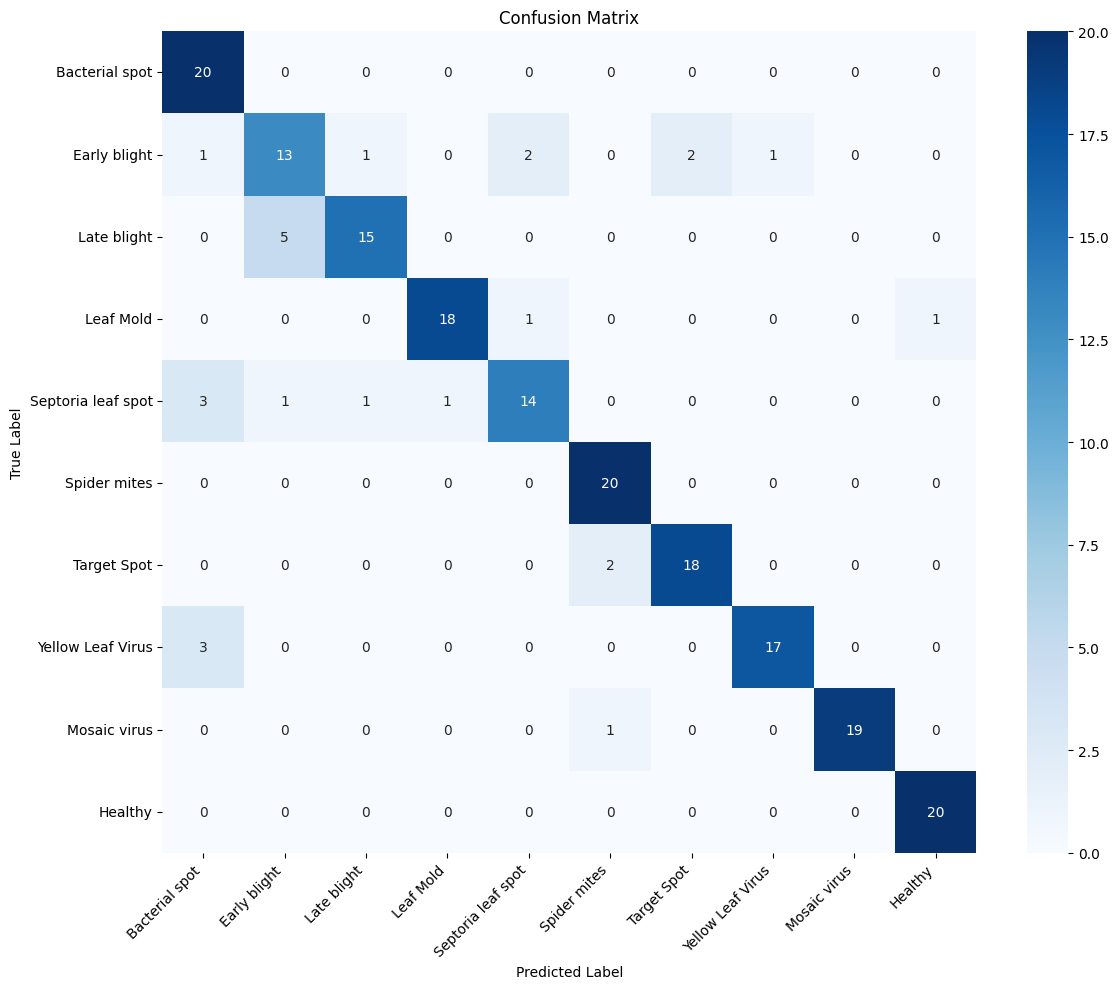

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reset the validation dataset
validation_dataset.reset()

# Predict on the entire validation dataset at once
predictions = model.predict(validation_dataset, verbose=1)

# Get true labels
true_labels = validation_dataset.classes
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create custom class labels
class_names = [
    "Bacterial spot",
    "Early blight",
    "Late blight",
    "Leaf Mold",
    "Septoria leaf spot",
    "Spider mites",
    "Target Spot",
    "Yellow Leaf Virus",
    "Mosaic virus",
    "Healthy"
]

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Calculate Precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate Recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Calculate ROC-AUC Score
# For ROC-AUC, we need the full prediction probabilities and true labels as one-hot
# First check if there are more than two classes
if len(np.unique(true_labels)) > 2:
    # Multi-class AUC
    true_labels_one_hot = np.eye(len(np.unique(true_labels)))[true_labels]
    roc_auc = roc_auc_score(true_labels_one_hot, predictions, multi_class='ovr')
else:
    # Binary AUC
    roc_auc = roc_auc_score(true_labels, predictions[:,1])

# Print scores
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


F1 Score: 0.8683
Precision: 0.8745
Recall: 0.8700
ROC-AUC Score: 0.9887


<ipython-input-13-a2403a396f54>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)  # 10 colors for 10 classes


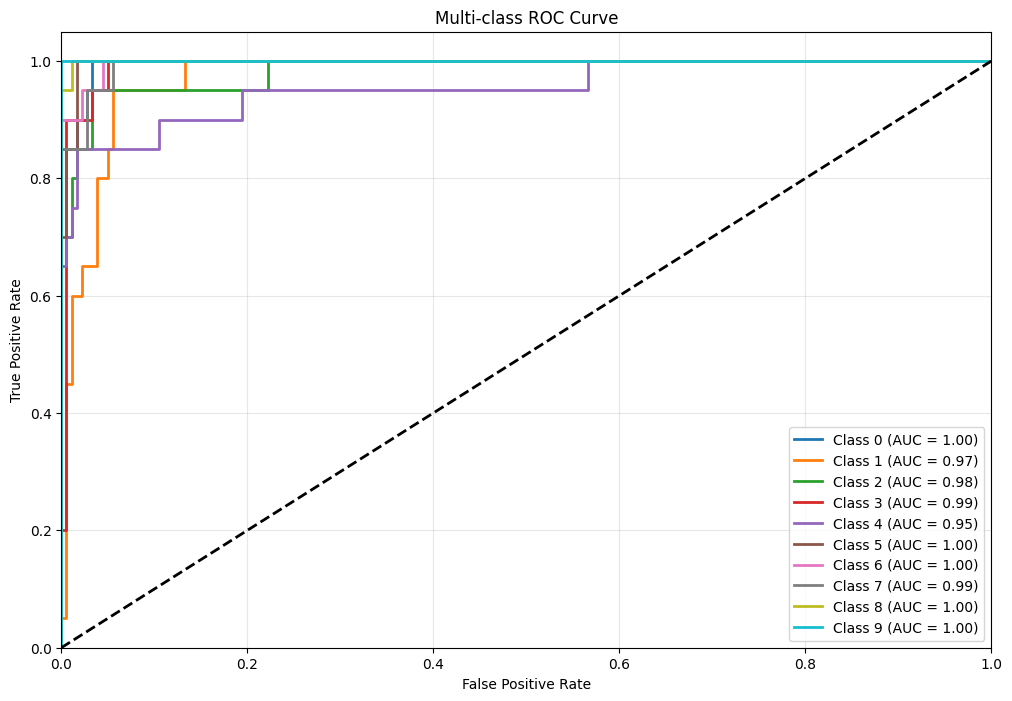

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Number of classes
n_classes = 10

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=list(range(n_classes)))

# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)  # 10 colors for 10 classes

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors(i),
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
